# 1. Project Overview

This analysis focuses on a monthly spend dataset from one of the key vendors, Medline. The goal is to uncover patterns in member purchasing behavior by examining order-level data across products, locations, and time.

## Objectives
- Provide a concise summary of key trends, outliers, and actionable insights
- Identify and explore core metrics (KPIs) that could help track purchasing behavior over time
- Ensure data integrity by checking for missing values, duplicate records, and pricing mismatches
- Deliver a clean, well-structured dataset that supports future reporting or dashboard use

## Dataset Fields
Each row represents a single line item from a purchase order. Key columns include:
- Sold-To Party: Unique ID for the member (e.g., clinic or practice)
- Name, City, State: Location information for the ordering entity
- Order '#', Order Date: Identifiers and timestamps for each purchase
- Item, Description: Product identifiers and descriptions
- Qty, UOM: Quantity ordered and the unit of measure
- Item Price, Extended Price: Unit price and total price (Qty × Price)

# 2. Initial Data Load and Structure

In [126]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
!pip install xlrd

In [128]:
df = pd.read_excel('Analyst Project - Data_v2.xls', header=2)
df

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price
0,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771473263,02/06/2025,PBE3942001,"SLIPPER,TERRY KNIT,DBL PRINT,YELLOW,CHIL",1,CS,103.41,103.41
1,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771661557,02/12/2025,MDSSPO2ADL,"SENSOR,PULSE OX,ADULT,REUSE,F/EDAN VS &",2,EA,117.87,235.75
2,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771847395,02/18/2025,OXB096409,"GUARD,WEITLANER,SMALL,MAGENTA",1,PK,27.75,27.75
3,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,03/03/2025,ASOLCB053,"DEVICE,PROCESS CHALLNG20STEAM25CNTRL",2,BX,192.16,384.33
4,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,03/03/2025,MSG9070Z,"GLOVE,SURG,SENSICARE PI,LF,PF,7.0",1,BX,74.06,74.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772407898,03/06/2025,NON25815,"PAPER,TOWEL,MULTIFOLD,NATURAL, 4000EA/CS",1,CS,28.37,28.37
2474,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,03/11/2025,TRG300L,"GLOVE, EXAM, NITRILE, PF, LF, 300, L",1,CS,158.13,158.13
2475,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,03/11/2025,0409-7332-01,CEFTRIAXONE 1GM SDV 10X1GM,2,BX,24.96,49.92
2476,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,03/11/2025,MAP135150,"MBO-WIPE,XL,CAVIWIPES9X12,65EA,CANISTR",1,CS,97.99,97.99


In [129]:
df.shape

(2478, 12)

In [130]:
df.dtypes

Sold-to party       int64
Name               object
City               object
State              object
Order #             int64
Order Date         object
Item               object
Description        object
Qty                 int64
UOM                object
Item Price        float64
Extended Price    float64
dtype: object

In [131]:
df.describe()

,Sold-to party,Order #,Qty,Item Price,Extended Price
count,2.478000e+03,2.478000e+03,2478.000000,2478.000000,2478.000000
mean,1.992252e+06,7.414429e+08,2.439064,63.433660,92.336106
std,3.383290e+05,1.789991e+08,4.182277,179.747884,226.409301
min,1.098235e+06,6.284585e+08,-20.000000,0.000000,-951.520000
25%,1.807269e+06,6.484490e+08,1.000000,8.900000,16.120000
50%,2.128326e+06,7.722951e+08,1.000000,28.100000,35.560000
75%,2.272197e+06,7.726717e+08,2.000000,69.557500,99.035000
max,2.376302e+06,2.108335e+09,100.000000,5027.800000,5027.800000


# 3. Data Cleaning and Integrity Checks

Null checks, Negative prices/quantities, Check Price mismatches, Check Duplicates

In [132]:
df.isna().sum()
# check for missing values

Sold-to party     0
Name              0
City              0
State             0
Order #           0
Order Date        0
Item              0
Description       0
Qty               0
UOM               0
Item Price        0
Extended Price    0
dtype: int64

In [133]:
df['UOM'].value_counts()

UOM
CS    928
BX    695
EA    579
PK    116
BG     61
BT     51
CN     14
RL     11
TB      9
PR      7
TR      2
KT      2
DZ      1
SL      1
GL      1
Name: count, dtype: int64

In [134]:
df[df['Item Price'] < 0]

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price


In [135]:
# standarize dates to format thats easy to use with pandas
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2024-07-29 00:00:00'), Timestamp('2025-03-28 00:00:00'))

In [136]:
df[df['Extended Price'] < 0]

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price
98,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,2108097649,2025-03-05,BMGR520101,"SOLUTN,SOD CHL,.9 PCNT,500ML,IRR,BTL",-1,CS,68.07,-68.07
219,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2107974766,2025-03-03,QTX88250510FR,"SUCTION COAG FOOTSWITCH 10FR 6""",-1,CS,161.54,-143.51
220,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2107974766,2025-03-03,DYND70293Z,"CONTAINER,DENTURE,W/LID,AQUA",-20,TB,3.12,-55.44
221,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2108076241,2025-03-04,DYND60605,"8CM,GREEN,GUEDEL AIRWAY",-1,BX,4.24,-4.24
222,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2108119157,2025-03-08,DYND60605,"8CM,GREEN,GUEDEL AIRWAY",-1,BX,4.24,-4.24
223,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2108119157,2025-03-08,DYND70293Z,"CONTAINER,DENTURE,W/LID,AQUA",-1,TB,3.12,-3.12
224,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2108209778,2025-03-14,DYNJS0702,ENT I,-5,EA,27.31,-136.55
282,1405337,ST CLOUD EAR NOSE AND THROAT,SAINT CLOUD,MN,2107987043,2025-02-19,MMASP78105,"BUTTON,SEPTAL,NASAL,5CM,MEDIUM",-1,EA,191.59,-191.59
433,1781240,ALLERGY AND ENT ASSOCIATES,HOUSTON,TX,2108070079,2025-03-03,ADC6012N,"MONITOR,SEMI-AUTO DIGITAL BP,NAVY",-2,EA,19.52,-39.04
434,1781240,ALLERGY AND ENT ASSOCIATES,HOUSTON,TX,2108144308,2025-03-10,B-D305540,"TRAY,ALLERGIST,1ML,27GX1/2"",PRECISION",-6,CS,151.11,-906.66


### Returns removal

In [210]:
df[df['Qty'] < 0]

# based on this we can see there are quite a few returns

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price,Order Month,Order Week,Total Items in Order,Is Return
98,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,2108097649,2025-03-05,BMGR520101,"SOLUTN,SOD CHL,.9 PCNT,500ML,IRR,BTL",-1,CS,68.07,-68.07,2025-03,2025-03-03,-1,True
219,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2107974766,2025-03-03,QTX88250510FR,"SUCTION COAG FOOTSWITCH 10FR 6""",-1,CS,161.54,-143.51,2025-03,2025-03-03,-21,True
220,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2107974766,2025-03-03,DYND70293Z,"CONTAINER,DENTURE,W/LID,AQUA",-20,TB,3.12,-55.44,2025-03,2025-03-03,-21,True
221,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2108076241,2025-03-04,DYND60605,"8CM,GREEN,GUEDEL AIRWAY",-1,BX,4.24,-4.24,2025-03,2025-03-03,-1,True
222,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2108119157,2025-03-08,DYND60605,"8CM,GREEN,GUEDEL AIRWAY",-1,BX,4.24,-4.24,2025-03,2025-03-03,-2,True
223,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2108119157,2025-03-08,DYND70293Z,"CONTAINER,DENTURE,W/LID,AQUA",-1,TB,3.12,-3.12,2025-03,2025-03-03,-2,True
224,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2108209778,2025-03-14,DYNJS0702,ENT I,-5,EA,27.31,-136.55,2025-03,2025-03-10,-5,True
282,1405337,ST CLOUD EAR NOSE AND THROAT,SAINT CLOUD,MN,2107987043,2025-02-19,MMASP78105,"BUTTON,SEPTAL,NASAL,5CM,MEDIUM",-1,EA,191.59,-191.59,2025-02,2025-02-17,-1,True
433,1781240,ALLERGY AND ENT ASSOCIATES,HOUSTON,TX,2108070079,2025-03-03,ADC6012N,"MONITOR,SEMI-AUTO DIGITAL BP,NAVY",-2,EA,19.52,-39.04,2025-03,2025-03-03,-2,True
434,1781240,ALLERGY AND ENT ASSOCIATES,HOUSTON,TX,2108144308,2025-03-10,B-D305540,"TRAY,ALLERGIST,1ML,27GX1/2"",PRECISION",-6,CS,151.11,-906.66,2025-03,2025-03-10,-6,True


## Duplicate Check & Removal

In [138]:
df.duplicated().sum()  

np.int64(15)

There are 15 duplicates. Below we can view them:

In [139]:
duplicate_rows = df[df.duplicated(subset=['Order #', 'Item'], keep=False)]
duplicate_rows

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price
26,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772482808,2025-03-10,ASOLCB053,"DEVICE,PROCESS CHALLNG20STEAM25CNTRL",1,BX,192.16,192.16
44,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772482808,2025-03-10,ASOLCB053,"DEVICE,PROCESS CHALLNG20STEAM25CNTRL",1,BX,192.16,192.16
99,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,647396777,2025-03-05,BMGR520101,"SOLUTN,SOD CHL,.9 PCNT,500ML,IRR,BTL",5,CS,68.07,340.34
100,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,647396777,2025-03-05,BMGR520101,"SOLUTN,SOD CHL,.9 PCNT,500ML,IRR,BTL",1,CS,68.07,68.07
175,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,648723518,2025-03-19,KDL3085Z,"SPONGE,SUPER,KERLIX,MED,STERILE,5'S",1,PK,1.35,1.35
191,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,648723518,2025-03-19,KDL3085Z,"SPONGE,SUPER,KERLIX,MED,STERILE,5'S",5,PK,1.35,6.75
230,1398303,DUBUQUE ENT HEAD AND NECK SURGERY,DUBUQUE,IA,647663052,2025-03-07,HUDMAD510,"TIP,MADOMOZIER,DISPOSABLE",3,BX,182.21,546.63
231,1398303,DUBUQUE ENT HEAD AND NECK SURGERY,DUBUQUE,IA,647663052,2025-03-07,HUDMAD510,"TIP,MADOMOZIER,DISPOSABLE",3,BX,182.21,546.63
245,1398303,DUBUQUE ENT HEAD AND NECK SURGERY,DUBUQUE,IA,648684149,2025-03-19,0713-0280-31,BACITRACIN 500 UN/GM ONT 1 OZ,3,EA,3.32,9.96
247,1398303,DUBUQUE ENT HEAD AND NECK SURGERY,DUBUQUE,IA,648684149,2025-03-19,0713-0280-31,BACITRACIN 500 UN/GM ONT 1 OZ,1,EA,3.32,3.32


Drop the duplicates and view our dataset without them.

In [140]:
df = df.drop_duplicates()
df

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price
0,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771473263,2025-02-06,PBE3942001,"SLIPPER,TERRY KNIT,DBL PRINT,YELLOW,CHIL",1,CS,103.41,103.41
1,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771661557,2025-02-12,MDSSPO2ADL,"SENSOR,PULSE OX,ADULT,REUSE,F/EDAN VS &",2,EA,117.87,235.75
2,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771847395,2025-02-18,OXB096409,"GUARD,WEITLANER,SMALL,MAGENTA",1,PK,27.75,27.75
3,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,ASOLCB053,"DEVICE,PROCESS CHALLNG20STEAM25CNTRL",2,BX,192.16,384.33
4,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,MSG9070Z,"GLOVE,SURG,SENSICARE PI,LF,PF,7.0",1,BX,74.06,74.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772407898,2025-03-06,NON25815,"PAPER,TOWEL,MULTIFOLD,NATURAL, 4000EA/CS",1,CS,28.37,28.37
2474,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,TRG300L,"GLOVE, EXAM, NITRILE, PF, LF, 300, L",1,CS,158.13,158.13
2475,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,0409-7332-01,CEFTRIAXONE 1GM SDV 10X1GM,2,BX,24.96,49.92
2476,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,MAP135150,"MBO-WIPE,XL,CAVIWIPES9X12,65EA,CANISTR",1,CS,97.99,97.99


## Price Consistency Check

In [141]:
(df['Qty'] * df['Item Price']).equals(df['Extended Price'])

False

In [142]:
df_extended_price_not_match = df[df['Extended Price'] != df['Qty'] * df['Item Price']]
df_extended_price_not_match

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price
1,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771661557,2025-02-12,MDSSPO2ADL,"SENSOR,PULSE OX,ADULT,REUSE,F/EDAN VS &",2,EA,117.87,235.75
3,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,ASOLCB053,"DEVICE,PROCESS CHALLNG20STEAM25CNTRL",2,BX,192.16,384.33
6,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,OTC692109,OXYMETAZOLONE 0.05% NASAL SPRAY 30ML,10,EA,2.01,20.10
13,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,B-D305551H,"CONTAINER,SHARPS,5.4 QT,NAT,HORIZ",5,EA,8.46,42.30
46,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772482808,2025-03-10,MMM1243AZ,"MBO-INTEGRATOR,CHEMICAL,STERIGAGE,500/PK",2,PK,42.42,84.83
...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2325533,LA ENTALLERGY- EAST LA,LOS ANGELES,CA,772954624,2025-03-24,MIL3334HH,"PUNCH,BIOPSY,DISPOSABLE,4MM",10,EA,2.04,20.42
2295,2325533,LA ENTALLERGY- EAST LA,LOS ANGELES,CA,772954624,2025-03-24,OTC692109,OXYMETAZOLONE 0.05% NASAL SPRAY 30ML,10,EA,1.91,19.10
2317,2325533,LA ENTALLERGY- EAST LA,LOS ANGELES,CA,772960317,2025-03-24,MDS4029509F,"TUBE,SUCTION,FRAZIER,30DEG,W/STYLET,9FR",20,EA,12.54,250.80
2319,2325533,LA ENTALLERGY- EAST LA,LOS ANGELES,CA,772960317,2025-03-24,MDS0040307,"TUBES,SUCTION,BARON,3FR,3""",20,EA,21.21,424.20


There are 176 items where extended price did not equal the quantity times the item price. The next cell checks which ones are not close with rounding within 0.001 or 0.1%.
Rounding errors may explain small mismatches. I filtered only those outside a 0.1% tolerance.

In [143]:
temp_df = df.copy()
temp_df.loc[:, 'Expected Price'] = temp_df['Qty'] * temp_df['Item Price']
temp_df.loc[:, 'Price Mismatch'] = ~np.isclose(temp_df['Extended Price'], temp_df['Expected Price'], rtol=1e-03)
temp_df[temp_df['Price Mismatch']]

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price,Expected Price,Price Mismatch
53,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772688507,2025-03-17,KDL31000H,"CATHETER,SUCTION,10FR",20,EA,0.43,8.58,8.60,True
94,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772919141,2025-03-24,KDL31000H,"CATHETER,SUCTION,10FR",10,EA,0.43,4.29,4.30,True
219,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2107974766,2025-03-03,QTX88250510FR,"SUCTION COAG FOOTSWITCH 10FR 6""",-1,CS,161.54,-143.51,-161.54,True
220,1325227,SPOKANE VALLEY AMBULATORY SC,SPOKANE VALLEY,WA,2107974766,2025-03-03,DYND70293Z,"CONTAINER,DENTURE,W/LID,AQUA",-20,TB,3.12,-55.44,-62.40,True
1052,1977055,MIDWEST EAR NOSE AND THROAT ASSOCIA,SIOUX FALLS,SD,772320518,2025-03-04,QTX280101H,"DEFOGGER,ANTI FOG",6,EA,1.58,9.46,9.48,True
1922,2284053,ENT AND ALLERGY SPECIALISTS,PHOENIXVILLE,PA,772980074,2025-03-25,MAP102805H,"STERILANT,METRICIDE 28,2.5%,28DAY,QT",4,EA,3.62,14.50,14.48,True
1931,2284336,ENT AND ALLERGY SPEC POTTSTOWN,POTTSTOWN,PA,773062309,2025-03-27,SWD301614H,"TUBING,CONNECT,FEMALE,1/4"" X 10'",20,EA,1.54,30.85,30.80,True
1932,2284336,ENT AND ALLERGY SPEC POTTSTOWN,POTTSTOWN,PA,773062309,2025-03-27,MAP102805H,"STERILANT,METRICIDE 28,2.5%,28DAY,QT",4,EA,3.62,14.50,14.48,True
1936,2284370,ENT AND ALLERGY SPEC BRYN MAWR,BRYN MAWR,PA,772158545,2025-02-27,MAP102805H,"STERILANT,METRICIDE 28,2.5%,28DAY,QT",4,EA,3.62,14.50,14.48,True


# 4. Feature Engineering

In [163]:
# adds order month and order week columns
df = df.copy()
df.loc[:, 'Order Month'] = df['Order Date'].dt.to_period('M').astype(str)
df.loc[:, 'Order Week'] = df['Order Date'].dt.to_period('W').apply(lambda x: x.start_time.strftime('%Y-%m-%d'))
df

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price,Order Month,Order Week,Total Items in Order
0,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771473263,2025-02-06,PBE3942001,"SLIPPER,TERRY KNIT,DBL PRINT,YELLOW,CHIL",1,CS,103.41,103.41,2025-02,2025-02-03,1
1,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771661557,2025-02-12,MDSSPO2ADL,"SENSOR,PULSE OX,ADULT,REUSE,F/EDAN VS &",2,EA,117.87,235.75,2025-02,2025-02-10,2
2,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771847395,2025-02-18,OXB096409,"GUARD,WEITLANER,SMALL,MAGENTA",1,PK,27.75,27.75,2025-02,2025-02-17,1
3,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,ASOLCB053,"DEVICE,PROCESS CHALLNG20STEAM25CNTRL",2,BX,192.16,384.33,2025-03,2025-03-03,53
4,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,MSG9070Z,"GLOVE,SURG,SENSICARE PI,LF,PF,7.0",1,BX,74.06,74.06,2025-03,2025-03-03,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772407898,2025-03-06,NON25815,"PAPER,TOWEL,MULTIFOLD,NATURAL, 4000EA/CS",1,CS,28.37,28.37,2025-03,2025-03-03,1
2474,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,TRG300L,"GLOVE, EXAM, NITRILE, PF, LF, 300, L",1,CS,158.13,158.13,2025-03,2025-03-10,6
2475,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,0409-7332-01,CEFTRIAXONE 1GM SDV 10X1GM,2,BX,24.96,49.92,2025-03,2025-03-10,6
2476,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,MAP135150,"MBO-WIPE,XL,CAVIWIPES9X12,65EA,CANISTR",1,CS,97.99,97.99,2025-03,2025-03-10,6


In [164]:
# adds total items in order column
df['Total Items in Order'] = df.groupby('Order #')['Qty'].transform('sum')

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price,Order Month,Order Week,Total Items in Order
0,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771473263,2025-02-06,PBE3942001,"SLIPPER,TERRY KNIT,DBL PRINT,YELLOW,CHIL",1,CS,103.41,103.41,2025-02,2025-02-03,1
1,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771661557,2025-02-12,MDSSPO2ADL,"SENSOR,PULSE OX,ADULT,REUSE,F/EDAN VS &",2,EA,117.87,235.75,2025-02,2025-02-10,2
2,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771847395,2025-02-18,OXB096409,"GUARD,WEITLANER,SMALL,MAGENTA",1,PK,27.75,27.75,2025-02,2025-02-17,1
3,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,ASOLCB053,"DEVICE,PROCESS CHALLNG20STEAM25CNTRL",2,BX,192.16,384.33,2025-03,2025-03-03,53
4,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,MSG9070Z,"GLOVE,SURG,SENSICARE PI,LF,PF,7.0",1,BX,74.06,74.06,2025-03,2025-03-03,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772407898,2025-03-06,NON25815,"PAPER,TOWEL,MULTIFOLD,NATURAL, 4000EA/CS",1,CS,28.37,28.37,2025-03,2025-03-03,1
2474,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,TRG300L,"GLOVE, EXAM, NITRILE, PF, LF, 300, L",1,CS,158.13,158.13,2025-03,2025-03-10,6
2475,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,0409-7332-01,CEFTRIAXONE 1GM SDV 10X1GM,2,BX,24.96,49.92,2025-03,2025-03-10,6
2476,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,MAP135150,"MBO-WIPE,XL,CAVIWIPES9X12,65EA,CANISTR",1,CS,97.99,97.99,2025-03,2025-03-10,6


### Returns

In [209]:
df['Is Return'] = df['Qty'] < 0
df

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price,Order Month,Order Week,Total Items in Order,Is Return
0,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771473263,2025-02-06,PBE3942001,"SLIPPER,TERRY KNIT,DBL PRINT,YELLOW,CHIL",1,CS,103.41,103.41,2025-02,2025-02-03,1,False
1,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771661557,2025-02-12,MDSSPO2ADL,"SENSOR,PULSE OX,ADULT,REUSE,F/EDAN VS &",2,EA,117.87,235.75,2025-02,2025-02-10,2,False
2,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,771847395,2025-02-18,OXB096409,"GUARD,WEITLANER,SMALL,MAGENTA",1,PK,27.75,27.75,2025-02,2025-02-17,1,False
3,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,ASOLCB053,"DEVICE,PROCESS CHALLNG20STEAM25CNTRL",2,BX,192.16,384.33,2025-03,2025-03-03,53,False
4,1098235,CENTRAL GA HEAD AND NECK SURGERY CT,MACON,GA,772223811,2025-03-03,MSG9070Z,"GLOVE,SURG,SENSICARE PI,LF,PF,7.0",1,BX,74.06,74.06,2025-03,2025-03-03,53,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772407898,2025-03-06,NON25815,"PAPER,TOWEL,MULTIFOLD,NATURAL, 4000EA/CS",1,CS,28.37,28.37,2025-03,2025-03-03,1,False
2474,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,TRG300L,"GLOVE, EXAM, NITRILE, PF, LF, 300, L",1,CS,158.13,158.13,2025-03,2025-03-10,6,False
2475,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,0409-7332-01,CEFTRIAXONE 1GM SDV 10X1GM,2,BX,24.96,49.92,2025-03,2025-03-10,6,False
2476,2376302,SAN DIEGO EAR NOSE & THROAT SPECIAL,CARLSBAD,CA,772552154,2025-03-11,MAP135150,"MBO-WIPE,XL,CAVIWIPES9X12,65EA,CANISTR",1,CS,97.99,97.99,2025-03,2025-03-10,6,False


# 5. Key KPIs / Metrics

In [213]:
df_clean = df[df['Qty'] >= 0]
# df clean is the dataframe without returns, using for everything but returns analysis going forward

### Total Spend

In [215]:
total_spend = df_clean['Extended Price'].sum()
print(f"Total Spend: ${total_spend:,.2f}")

Total Spend: $231,237.82


### Top 5 Items by Spend

In [216]:
top_items_by_spend = df_clean.groupby('Description')['Extended Price'].sum().sort_values(ascending=False).head(5)
top_items_by_spend

Description
ADRENALIN 1 MG/ML MDV 30 ML                 17510.21
LIDOCAINE 4% TOPICAL SOLN 50 ML              5994.32
STERILIZER,STEAM,RITTER,M11,115V             5027.80
SPONGE,CLEANING,INSTRUMENT,ENDOZIME,MINI     4064.10
MONITOR,VITALS,IM60,PRT,TCH,WIFI,CO2         4050.00
Name: Extended Price, dtype: float64

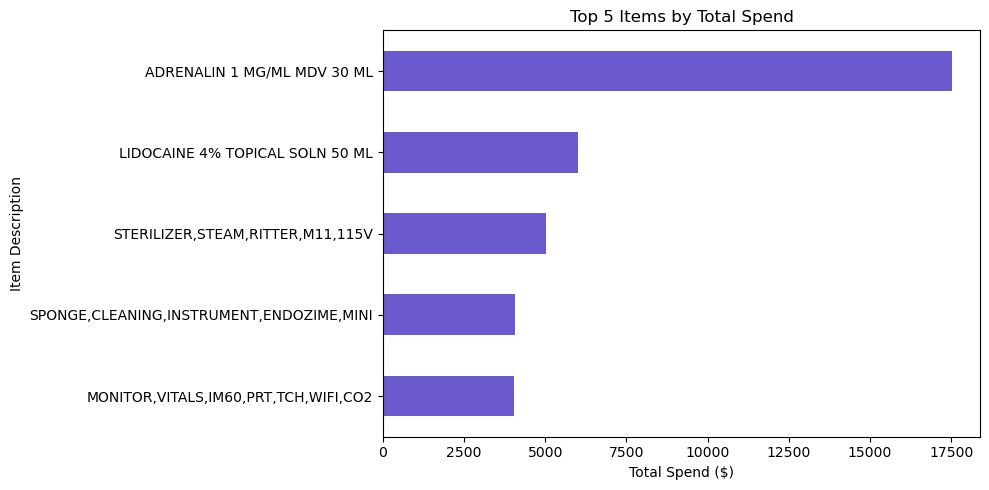

In [217]:
top_items_by_spend.plot(kind='barh', figsize=(10, 5), color='slateblue')

plt.title('Top 5 Items by Total Spend')
plt.xlabel('Total Spend ($)')
plt.ylabel('Item Description')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Most Frequently Ordered Items

In [219]:
top_items_by_qty = df_clean.groupby('Description')['Qty'].sum().sort_values(ascending=False).head(5)
print(top_items_by_qty)

Description
OXYMETAZOLONE 0.05% NSL SPRY 30ML           320
BASIN,EMESIS,GRAPHITE,500ML                 251
PAD,PREP,ALCOHOL,LARGE,2-PLY,STERILE        154
PAPER,TISSUE,FACE,STND,5.7"X7",40SHT/1EA    125
LIDOCAINE 4% TOPICAL SOLN 50 ML             122
Name: Qty, dtype: int64


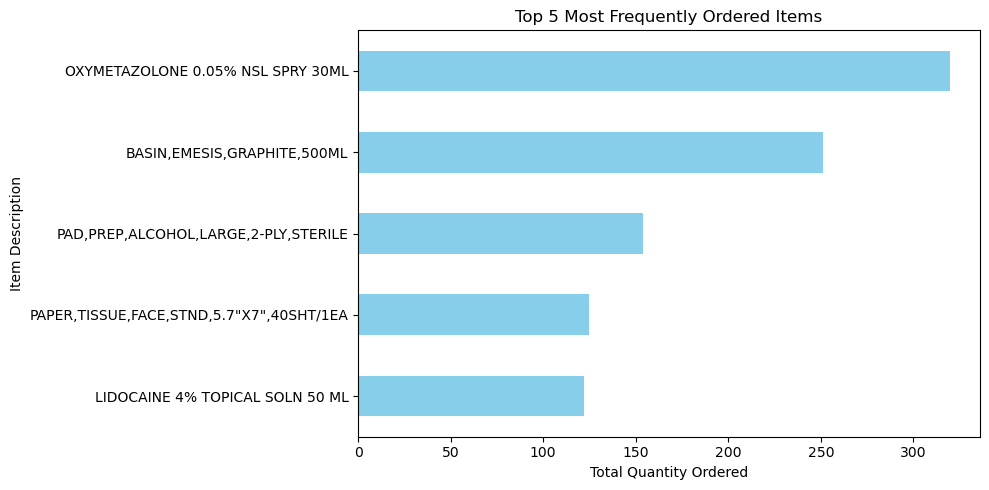

In [220]:
top_items_by_qty.plot(kind='barh', figsize=(10, 5), color='skyblue')
plt.title('Top 5 Most Frequently Ordered Items')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Item Description')
plt.gca().invert_yaxis()  # optional: puts most-ordered item on top
plt.tight_layout()
plt.show()

### Spend by Unit of Measure (UOM)

In [221]:
spend_by_uom = df_clean.groupby('UOM')['Extended Price'].sum().sort_values(ascending=False)
print(spend_by_uom)

UOM
CS    95733.10
EA    79682.09
BX    45436.83
PK     3734.32
BT     3639.72
BG     2131.78
CN      246.27
RL      120.27
TB      108.60
DZ      101.70
TR      101.60
GL       99.12
PR       79.32
KT       22.04
SL        1.06
Name: Extended Price, dtype: float64


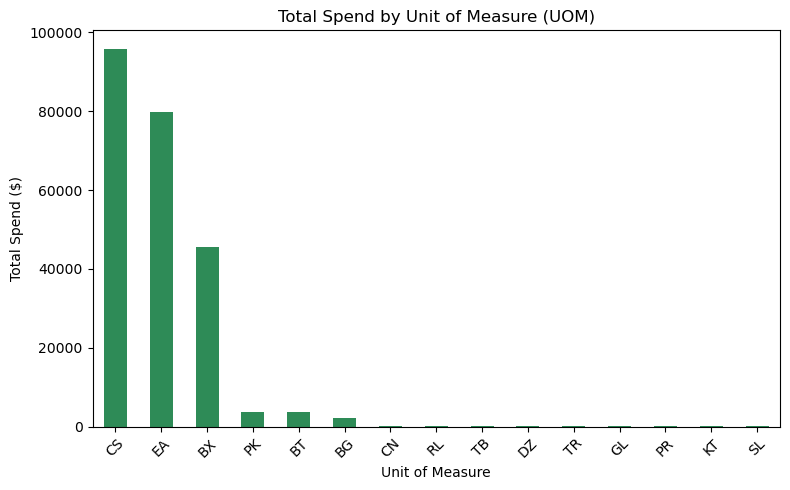

In [222]:
spend_by_uom.plot(kind='bar', figsize=(8, 5), color='seagreen')

plt.title('Total Spend by Unit of Measure (UOM)')
plt.xlabel('Unit of Measure')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CS – Case: A large unit typically containing many individual items or boxes.

EA – Each: Single item units (like one syringe, one glove).
    
BX – Box: A medium-sized unit, typically contains a set number of individual items (like 100 gloves).
    
PK – Pack: Usually smaller than a box; often a few items bundled (like 5 or 10 items).
    
BT – Bottle: Used for liquid medications or cleaning solutions.
    
BG – Bag: Items sold in bags (like masks, gauze, etc).

### Average Spend per Order

In [223]:
avg_spend_per_order = df_clean.groupby('Order #')['Extended Price'].sum().mean()
print(f"Average Spend per Order: ${avg_spend_per_order:,.2f}")

Average Spend per Order: $492.00


### Average Spend per Clinic

In [224]:
avg_spend_per_order_clinic = (
    df_clean
    .groupby(['Name','Order #'])['Extended Price']
    .sum()
    .reset_index()
)
avg_spend_per_clinic = (
    avg_spend_per_order_clinic
    .groupby('Name')['Extended Price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

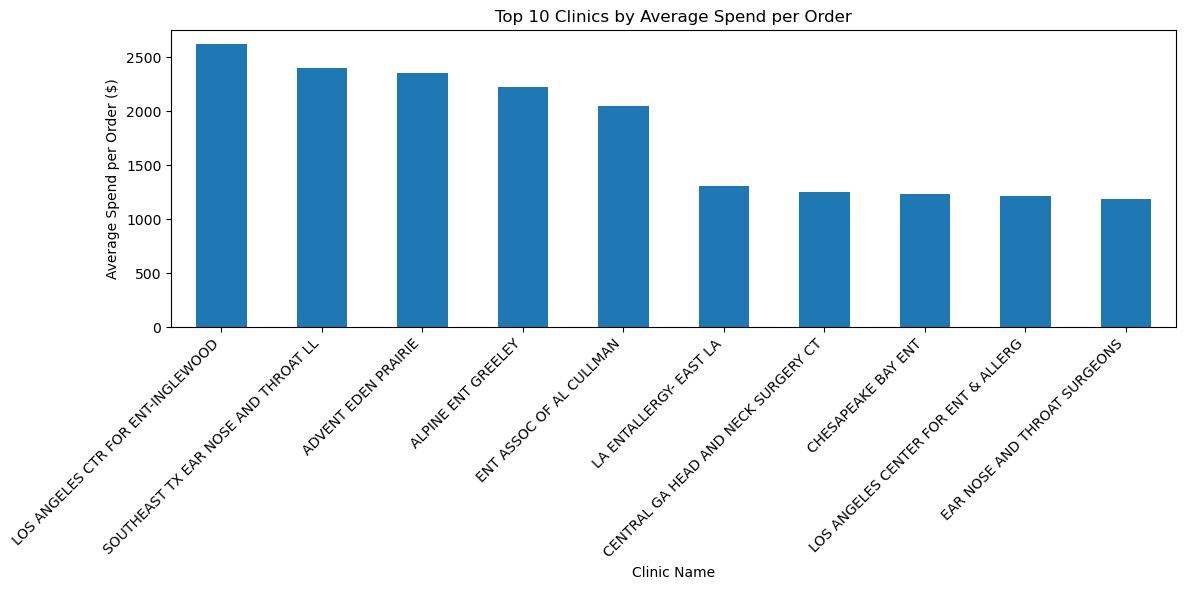

In [225]:
plt.figure(figsize=(12,6))
avg_spend_per_clinic.plot(
    kind='bar',
    title='Top 10 Clinics by Average Spend per Order'
)
plt.ylabel('Average Spend per Order ($)')
plt.xlabel('Clinic Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Total Spend by Clinic

In [226]:
spend_by_clinic = df_clean.groupby('Name')['Extended Price'].sum().sort_values(ascending=False)
spend_by_clinic

Name
ADVENT                                 23633.03
ADVENT EDEN PRAIRIE                    14135.49
CENTRAL GA HEAD AND NECK SURGERY CT    10051.45
SPOKANE VALLEY AMBULATORY SC            8249.17
LA ENTALLERGY- EAST LA                  7843.28
                                         ...   
STEPHANIE HERRERA MD AND ASSOCIATES       54.56
ADULT AND CHILD ENT BETHLEHEM TWP         45.85
ADVANCED ENT AND ALLERGY VOORHEES         44.42
ADVANCED ENT AND ALLERGY SEWELL           44.42
OAT                                       11.78
Name: Extended Price, Length: 114, dtype: float64

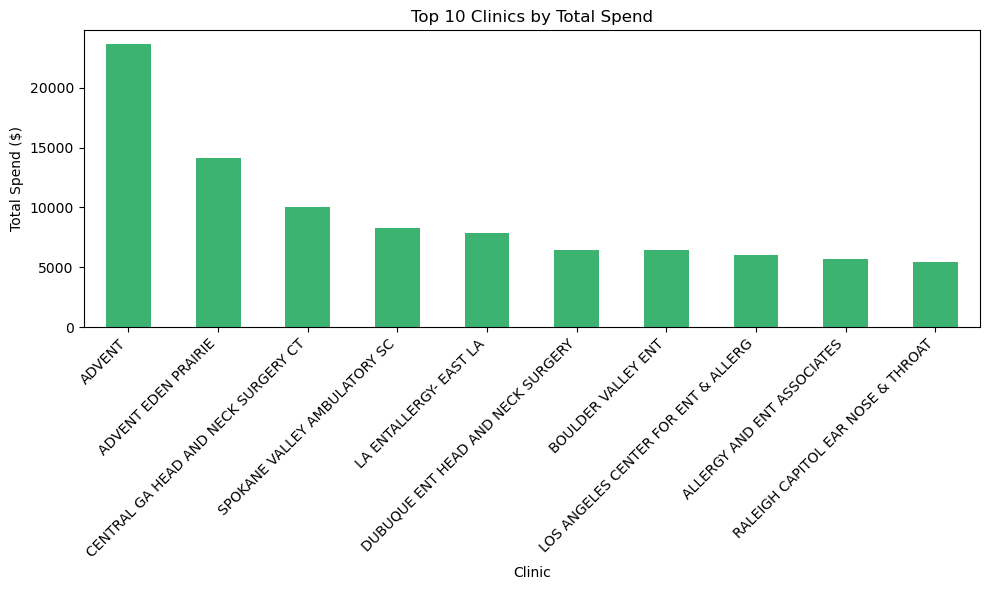

In [227]:
top_spend_clinics = spend_by_clinic.head(10)
plt.figure(figsize=(10, 6))
top_spend_clinics.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Clinics by Total Spend')
plt.ylabel('Total Spend ($)')
plt.xlabel('Clinic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Orders Over Time (Month or Week)

Note: Spend by month was reviewed but excluded from final presentation due to unusually heavy skew toward March with no clear explanation from available data.

In [228]:
monthly_spend = df_clean.groupby('Order Month')['Extended Price'].sum()
weekly_spend = df_clean.groupby('Order Week')['Extended Price'].sum()

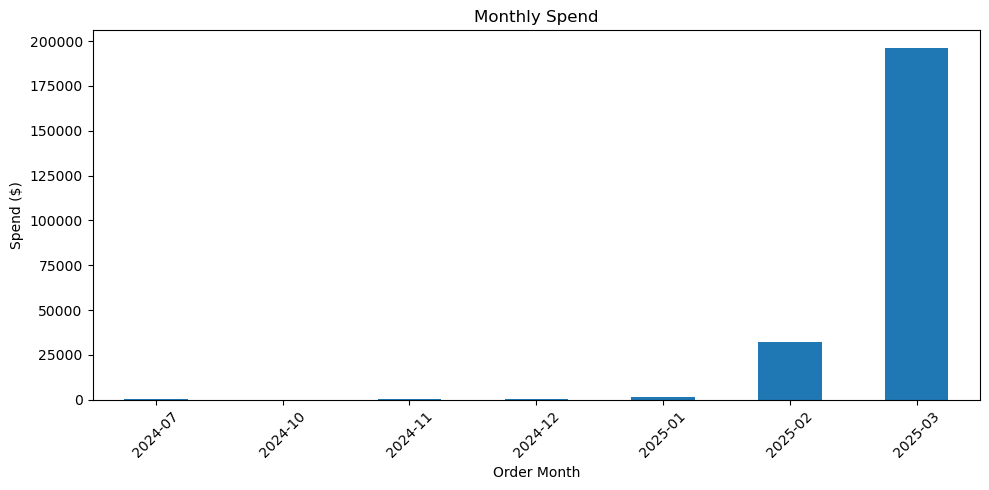

In [229]:
monthly_spend.plot(kind='bar', title='Monthly Spend', ylabel='Spend ($)', xlabel='Order Month', figsize=(10, 5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relationship between the total number of items in each order

<Axes: xlabel='Total Items in Order', ylabel='Extended Price'>

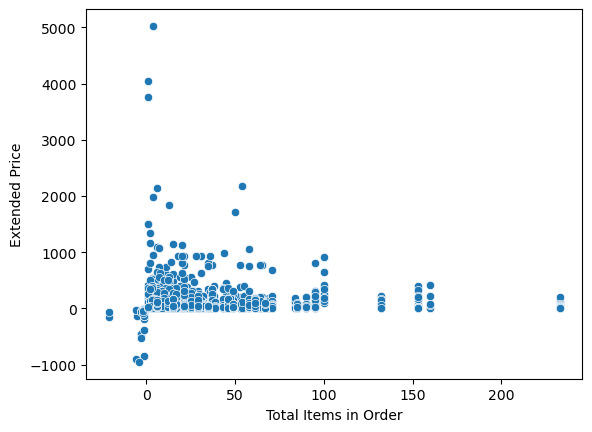

In [230]:
sns.scatterplot(data=df, x='Total Items in Order', y='Extended Price')

### Top 5 total extended price by state

In [241]:
df_clean.groupby('State')['Extended Price'].sum().sort_values(ascending=False).head(5)

State
CA    31989.89
WI    26622.05
MN    23646.36
CO    21688.11
IL    20067.28
Name: Extended Price, dtype: float64

## Returns Analysis

### Return Rate

In [200]:
return_rate = len(returns) / len(df)
return_rate

0.015022330491270807

### Total Returned Spend

In [191]:
total_returns = df[df['Extended Price'] < 0]['Extended Price'].sum()
total_returns

np.float64(-6424.980000000001)

### Top returned items

In [192]:
returned_items = df[df['Qty'] < 0].groupby('Description')['Qty'].sum().sort_values()
returned_items

Description
CONTAINER,DENTURE,W/LID,AQUA               -21
TRAY,ALLERGIST,1ML,27GX1/2",PRECISION       -9
ALCOHOL,RUBBING,70PERCEN ISOPROPYL,1-GAL    -8
CANISTER, RIGID, 2000CC                     -6
ENT I                                       -5
BOTTOM SECTION,ONLY,F/71000-A               -4
TRAY,ALERGIST,1/2ML,27GX3/8",PRECISN        -3
FORCEP,EAR,HARTMANN-NOYES,3 1/2             -3
MONITOR,SEMI-AUTO DIGITAL BP,NAVY           -2
SPECULA,GRUBER,EAR,OVAL,3X4MM               -2
8CM,GREEN,GUEDEL AIRWAY                     -2
NEEDLE,HYPODERM,SAFETY,27GX1.25             -2
XYLOCAINE 2% EPI 1:100000 MDV 25X20ML       -2
CUP,MEDICINE,GRADUATED,CLEAR,2 OZ           -1
BRUSH,INSTRUMENT, CLEANING                  -1
BUTTON,SEPTAL,NASAL,5CM,MEDIUM              -1
PAPER,PRO TOWEL,TIS/POLY,2PLY,WHT,17X19"    -1
KIT,SUCTION CANISTER,850CC FL LID TUBI      -1
DISTILLED WATER, 1GAL, 6/CARTON             -1
DISINFECTANT,METRICIDE OPA PLUS,GL          -1
SOLUTN,SOD CHL,.9 PCNT,500ML,IRR,BTL        -1
S

### Returns by Clinic

In [199]:
returns_by_clinic = df[df['Qty'] < 0].groupby('Name')['Extended Price'].sum().sort_values()
returns_by_clinic

Name
ALLERGY AND ENT ASSOCIATES            -1853.35
NORTH BAY ENT- AUDIOLOGY DIVISION      -951.52
SOUTHERN INDIANA ENT                   -848.23
BOULDER VALLEY ENT                     -518.22
ADVENT                                 -470.99
CHESAPEAKE BAY ENT                     -385.79
SPOKANE VALLEY AMBULATORY SC           -347.10
ST CLOUD EAR NOSE AND THROAT           -191.59
ALLERGY & ENT RICHMOND                 -148.94
ADVENT MAPLE GROVE                     -130.01
CHICAGO ENT-AMITA OUTPATIENT PAVILI    -119.52
ADVENT WOODBURY                        -113.66
PINNACLE ENT ASSOCIATES LLC             -98.29
PINNACLE ENT DOYLESTOWN                 -72.10
CENTRAL GA HEAD AND NECK SURGERY CT     -68.07
ENT AND ALLERGY SPEC BRYN MAWR          -38.26
NJ ENT AND FACIAL PLASTIC SURGERY       -25.68
RALEIGH CAPITOL EAR NOSE AND THROAT     -22.01
ADVENT JOLIET                           -21.65
Name: Extended Price, dtype: float64

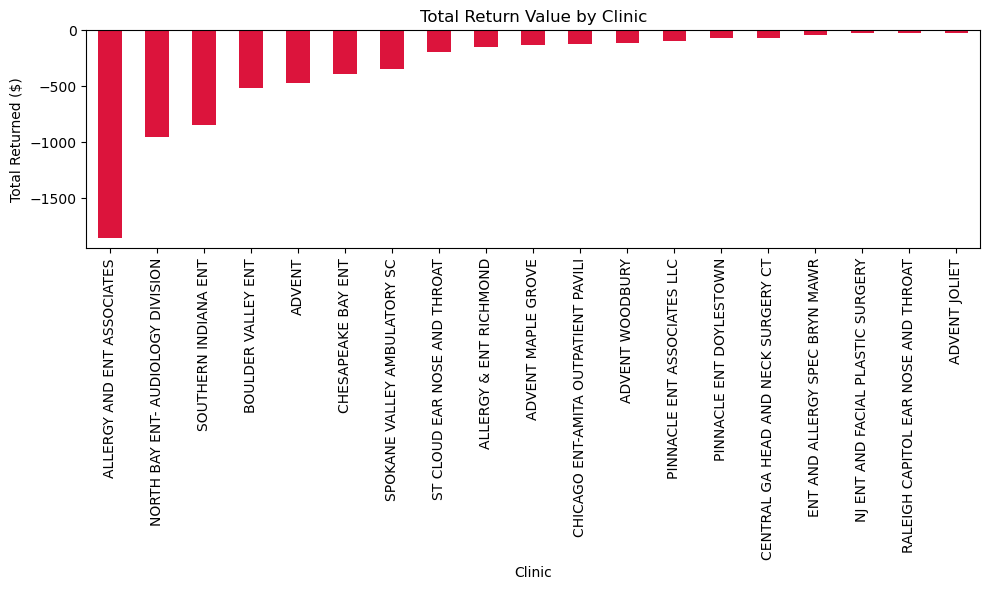

In [201]:
plt.figure(figsize=(10, 6))
returns_by_clinic.plot(kind='bar', color='crimson')
plt.title('Total Return Value by Clinic')
plt.xlabel('Clinic')
plt.ylabel('Total Returned ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Business Insights & Opportunities

## 6.1 Price Outliers

There are a few outliers, but these seem resonable since they are for expensive equipment or medicine. Note: this includes returns

In [231]:
df_outlier = df.copy()

df_outlier['Item Price Z'] = zscore(df_outlier['Item Price'])

# filter for outliers
outliers = df_outlier[np.abs(df_outlier['Item Price Z']) > 3]
outliers

,Sold-to party,Name,City,State,Order #,Order Date,Item,Description,Qty,UOM,Item Price,Extended Price,Order Month,Order Week,Total Items in Order,Is Return,Item Price Z
589,1807269,ADVENT,WAUWATOSA,WI,647680457,2025-03-07,NDD25002A,"SPIROMETER,EASYONE,AIR",1,EA,2182.50,2182.50,2025-03,2025-03-03,54,False,11.766055
799,1811967,AZ DESERT EAR/NOSE/THROAT SPECIALIS,GOODYEAR,AZ,772205311,2025-02-28,63323-488-37,XYLOCAINE MPF 1.5% EPI 200K SDV 25X30ML,1,BX,618.02,618.02,2025-02,2025-02-24,15,False,3.080300
827,1811967,AZ DESERT EAR/NOSE/THROAT SPECIALIS,GOODYEAR,AZ,772782946,2025-03-18,ETHU203H,"SUTURE,CHROMIC GUT,4-0,RB-1,27,UNDYD",1,BX,647.45,647.45,2025-03,2025-03-17,6,False,3.243691
845,1855817,ASSOCIATES OF OTOLARYNGOLOGY,DENVER,CO,772318598,2025-03-04,BFFVS35302,"FILTER,VARIABLE LIFE,3-PORT,VIROVAC",1,CS,819.35,819.35,2025-03,2025-03-03,14,False,4.198054
939,1926949,COLORADO ENT AND ALLERGY,COLORADO SPRINGS,CO,773046571,2025-03-26,ARNA942,"DESSICATOR,HIGH FREQ,40 WATT,942",1,EA,1338.02,1338.02,2025-03,2025-03-24,2,False,7.077631
1090,1996188,GREENVILLE ENT ALLERGY ASSOCIATES,GREENVILLE,SC,773074436,2025-03-27,DETSPBT1728,"CART,SS,F/BABY SCALE",1,EA,700.32,700.32,2025-03,2025-03-24,1,False,3.537218
1181,2049377,SOUTHERN INDIANA ENT,COLUMBUS,IN,2107047696,2024-09-17,MDS4631182,"PUNCH, OSTRUM, ROTATING 360 DEGREE, ADUL",-1,EA,848.23,-848.23,2024-09,2024-09-16,-1,True,4.358391
1976,2318985,ADVENT EDEN PRAIRIE,EDEN PRAIRIE,MN,772597209,2025-03-12,W-A34XFSTB,"DEVICE,CONNEX,PROBP 3400,MOBILE,SURE",2,EA,989.97,1979.94,2025-03,2025-03-10,4,False,5.145310
1977,2318985,ADVENT EDEN PRAIRIE,EDEN PRAIRIE,MN,772597209,2025-03-12,MIMM11042,"STERILIZER,STEAM,RITTER,M11,115V",1,EA,5027.80,5027.80,2025-03,2025-03-10,4,False,27.562726
2069,2318985,ADVENT EDEN PRAIRIE,EDEN PRAIRIE,MN,648262614,2025-03-14,ZOL800400701,"DEFIBRILATOR,AED,PLUS,AUTOMATIC,RX",1,EA,1499.03,1499.03,2025-03,2025-03-10,1,False,7.971534


## 6.2. Top Items by Total Spend

Note: this excludes returns

In [233]:
df_clean.groupby('Description').agg({
    'Qty': 'sum',
    'Extended Price': 'sum',
    'Item Price': ['mean', 'min', 'max']
}).sort_values(('Extended Price', 'sum'), ascending=False)

Qty Extended Price   Item Price  \
                                          sum            sum         mean   
Description                                                                 
ADRENALIN 1 MG/ML MDV 30 ML                99       17510.21   180.320571   
LIDOCAINE 4% TOPICAL SOLN 50 ML           122        5994.32    48.247778   
STERILIZER,STEAM,RITTER,M11,115V            1        5027.80  5027.800000   
SPONGE,CLEANING,INSTRUMENT,ENDOZIME,MINI   23        4064.10   176.700000   
MONITOR,VITALS,IM60,PRT,TCH,WIFI,CO2        1        4050.00  4050.000000   
...                                       ...            ...          ...   
TOURNIQUET, BLUE, 1"X18",ROLLED & BANDED    5           1.70     0.340000   
WIPE, BABY, FRAGRANCE FREE, 40WIPES/PK      1           1.54     1.540000   
CUPS, MEDICINE, GRADUATED, PLASTIC, 1 OZ    1           1.06     1.060000   
SHIRT,SCRUB,VNECK,BLUE,MED,DISPOSABL        1           0.95     0.950000   
SPECTRUM PRO DISPENSER, AUTO, WHITE         2           0.00     0.000000   

                                                            
                                              min      max  
Description                                                 
ADRENALIN 1 MG/ML MDV 30 ML                124.99   366.53  
LIDOCAINE 4% TOPICAL SOLN 50 ML             43.60    62.98  
STERILIZER,STEAM,RITTER,M11,115V          5027.80  5027.80  
SPONGE,CLEANING,INSTRUMENT,ENDOZIME,MINI   176.70   176.70  
MONITOR,VITALS,IM60,PRT,TCH,WIFI,CO2      4050.00  4050.00  
...                                           ...      ...  
TOURNIQUET, BLUE, 1"X18",ROLLED & BANDED     0.34     0.34  
WIPE, BABY, FRAGRANCE FREE, 40WIPES/PK       1.54     1.54  
CUPS, MEDICINE, GRADUATED, PLASTIC, 1 OZ     1.06     1.06  
SHIRT,SCRUB,VNECK,BLUE,MED,DISPOSABL         0.95     0.95  
SPECTRUM PRO DISPENSER, AUTO, WHITE          0.00     0.00  

[926 rows x 5 columns]

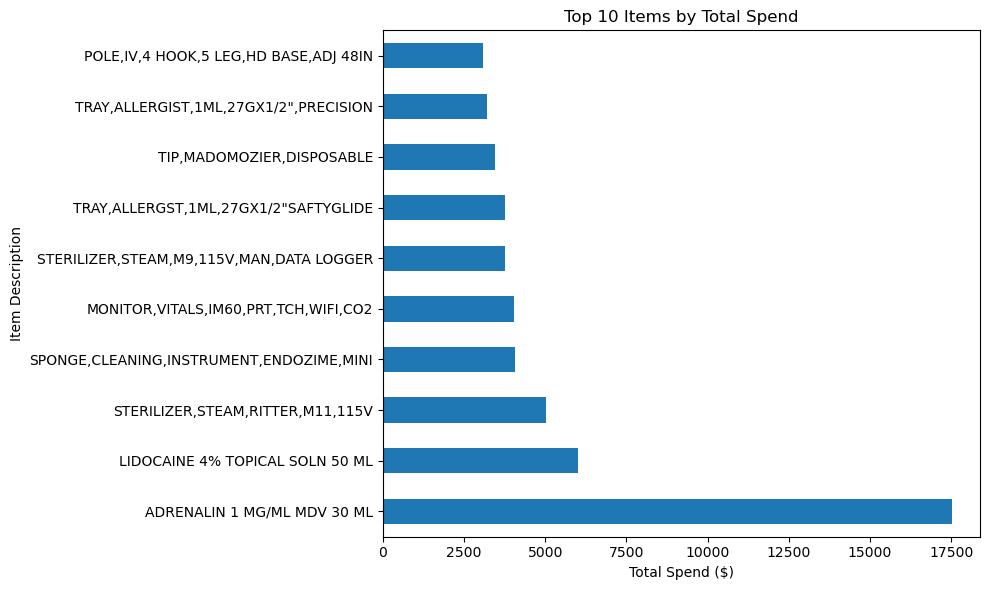

In [234]:
top_items = df_clean.groupby('Description')['Extended Price'].sum().sort_values(ascending=False).head(10)

top_items.plot(kind='barh', figsize=(10, 6), title='Top 10 Items by Total Spend')
plt.xlabel('Total Spend ($)')
plt.ylabel('Item Description')
plt.tight_layout()
plt.show()

## 6.3 Bulk Purchase Candidates

Note: this does not include returned orders

### Clinics that bought over 50 in one purchase

For example: Spokane Valley Ambulatory SC ordered 150 units of “BASIN, EMESIS, GRAPHITE, 500ML” so they could benefit from a direct bulk deal.

In [235]:
bulk_by_clinic = df_clean.groupby(['Name', 'Description', 'UOM'])['Qty'].sum().reset_index()
bulk_by_clinic = bulk_by_clinic[bulk_by_clinic['Qty'] > 50].sort_values(by='Qty', ascending=False)
bulk_by_clinic

,Name,Description,UOM,Qty
1718,SPOKANE VALLEY AMBULATORY SC,"BASIN,EMESIS,GRAPHITE,500ML",EA,150
55,ADVENT,OXYMETAZOLONE 0.05% NSL SPRY 30ML,EA,83
57,ADVENT,"PAD,PREP,ALCOHOL,LARGE,2-PLY,STERILE",BX,70
1284,LA ENTALLERGY- EAST LA,"BASIN,EMESIS,GRAPHITE,500ML",EA,60


### broader system-wide product standardization potential

For example: ADRENALIN 1 MG/ML MDV 30 ML” is used by 15 clinics so even if they each order smaller quantities, collectively this can justify a bulk order.

In [237]:
item_clinic_counts = df_clean.groupby(['Description'])['Name'].nunique().reset_index(name='Num_Clinics')
item_clinic_counts = item_clinic_counts[item_clinic_counts['Num_Clinics'] > 5]  # can adjust threshold if want ones that more clinics use
item_clinic_counts

,Description,Num_Clinics
6,ADRENALIN 1 MG/ML MDV 30 ML,15
13,"ALCOHOL,RUBBING,70PERC ISOPROPYL,16-OZ",13
14,"ALCOHOL,RUBBING,70PERCEN ISOPROPYL,1-GAL",6
51,"BASIN,EMESIS,GRAPHITE,500ML",6
53,"BATTERY, ALKALINE, MEDCELL, 1.5V, AA",7
...,...,...
890,"UNDERPAD,LIGHT,23X24,200/CS",7
896,"WATER,DISTILLED,3 LITER PER BOTTLE",16
912,"WIPE,TOUCHSCREEN CLEANING,6X6,160CT",7
914,"WIPES,ISOPROP,ALCOHL,70%,40/CO",13
